# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>

# Question 1: Stochastic gradient descent II

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`.

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively.

Observe the results, compare the performance of the two learning methods. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

num_of_coefs = 6
num_terms = 6

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.velocity = np.zeros(num_of_coefs) #used for velocity in momentum
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama*self.cache + (1-self.gama)*gradient**2
        self.coef = self.coef - (self.learning_rate/((self.cache + self.eps)**0.5))*gradient
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.velocity = (self.mu*self.velocity) + (self.learning_rate*gradient)
        self.coef = self.coef - self.velocity
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        
        # Get a matrix comprised of 
        # intercept & easily usable raw data
        # for more information, refer to the 'get_features' function located below
        
        X = self.get_features(X)
        
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                # we will find error. before doing so 
                # bring the x values in an easily usable form
                X_i = X[i,:]
                
                # calc the error [predicted - actual]
                e_i = self.linearPredict(X_i) - y[i]
                
                # Compute gradients
                gradient = 2*(e_i * X_i) + 2*(self.regularization * self.coef)
                
                # Update weights based on the choosen method.
                # if input is incorrect, print an error message
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                
                elif update_rule == 'rmsprop':
                    self.rmsprop(gradient)
                
                else:
                    print("Error happened. Please input correct method")
                    
   
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
    
    # Bring a raw data and make an matrix follwing the format of
    # 1(intercept)    X1    X1X2    X1^2X*2    X1*X2^2    X2^3    
    
    def get_features(self, X):
        
        x = np.zeros((X.shape[0], num_terms))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0]*(X[:,1]**2)
        x[:,5] = X[:,1]**3
        
        return x
    
    def linearPredict(self, X_features):
        
        lp = X_features.dot(self.coef)
        
        return lp

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_54972/1294811848.py:89: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_54972/1294811848.py:73: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(e_i * X_i) + 2*(self.regularization * self.coef)
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_54972/1294811848.py:73: RuntimeWarning: invalid value encountered in multiply
  gradient = 2*(e_i * X_i) + 2*(self.regularization * self.coef)
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_54972/1294811848.py:35: RuntimeWarning: invalid value encountered in add
  self.velocity = (self.mu*self.velocity) + (self.learning_rate*gradient)


Best Hyper parameter 1: (0.0001, 0)
Best Hyper parameter 2: (0.001, 0)
[0.020338107645762996, 0.020350898792292647]


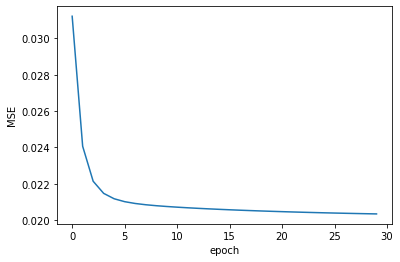

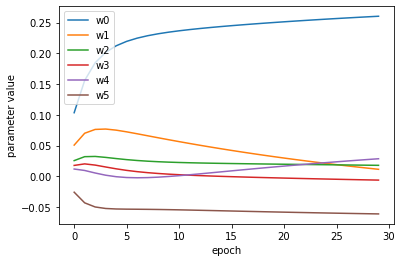

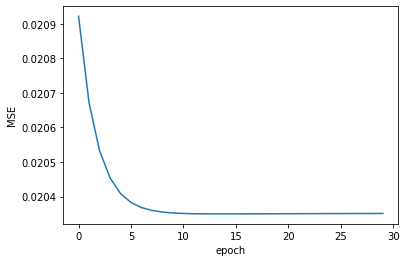

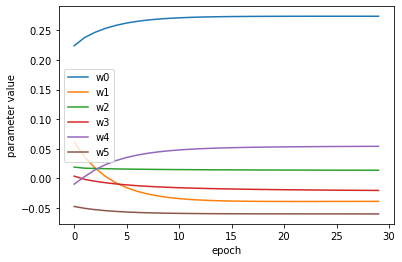

In [5]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
        
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = Regression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,plot=False)
    lowest_scores.append(sgd.lowest_mse)

chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print("Best Hyper parameter 1:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = Regression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)


Best Hyper parameter 1 with rmsprop: (0.001, 0)
Best Hyper parameter 2 with rmsprop: (0.001, 0.01)
[0.020202855335249133, 0.020331638749269285]


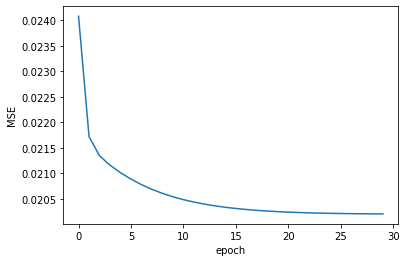

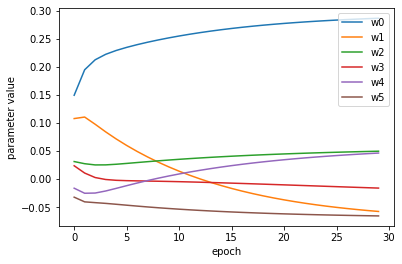

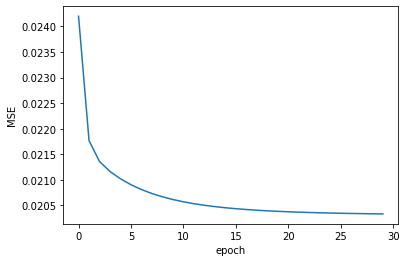

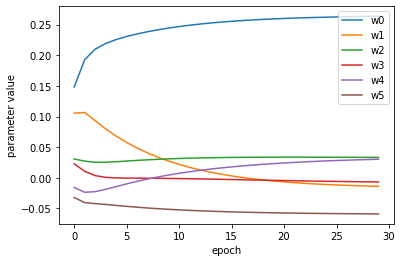

In [6]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
        
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = Regression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,'rmsprop',plot=False)
    lowest_scores.append(sgd.lowest_mse)

chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print("Best Hyper parameter 1 with rmsprop:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2 with rmsprop:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = Regression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X,y,'rmsprop',plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

# Answer:

 One of the problem SGD exhibits is the hesitant proceeding when it faces some kind of ravine in which a steepness of a dimension is way higher than that of another, which is likely to be observed around local minima. One potential improvement of SGD approach can be momentum that provides the gradient in question with more speed when it goes to proper direction, while with restraint when it heads to inappropriate direction. 
 
 On the other hand, RMSprop can confer some smoothness to the Adagrad's rapidly decaying learning rate by utilizing the blend between a portion of previous gradient and that of current one. Doing so, RMSprop allows the gradient not to be so hesitant in the last steps of gradient.
 
 In terms of this, even though the two method shows little bit different selection pattern of learning rate and penalty terms, they seems to be successful in finding 'satisfactory' minima, showing off around 0.02 Mean squared error

# Question 2

Tensorflow Playground

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

a) Train Loss / Test Loss  

Tanh Activation : 0.211 / 0.180  
   
Linear Activation: 0.495 / 0.500 

Qualitatevly, I could observe a kind of three-part cut with Tahn activation funtion, while I couldn't see any clearly divided parts with the model adopting linear activation in the hidden layer. From a geographycal viewpoint This might be because the linear activation is not able to smooth or connet the two lines generated by the two nodes in the hidden layer, while the non-linear tanh is. 

b)  
Default with 4 nodes: 0.096 / 0.116  

Default with 8 nodes: 0.006 / 0.012

I could observe three parts with the four nodes model, while four and more clearly divided parts with the 8 nodes model. This might be explained by the fact that the number of node in the first hidden layers can roughly be said that the number of line we draw to determine decision boundaries. In this sense, more nodes mean more cuts, which results in more detailed decision boundary leading to better test set loss in this case. 

c) train error / test error  
Learning rate 10  
100 epochs: 0.360 / 0.472  
1000 epochs: 0.360 / 0.472

Learning Rate 1  
100 epochs: 0.280 / 0.287  
1000 epochs: 0.270 / 0.284

Learning Rate 0.1  
100 epochs: 0.219 / 0.245  
1000 epochs: 0.000 : 0.004

Learning Rate 0.001  
100 epochs:  0.102 : 0.116  
1000 epochs: 0.013 : 0.015

Learning Rate 0.0001  
100 epochs:  0.295 / 0.301  
1000 epochs: 0.092 / 0.096

 From this plays, I could more consture the concepts. Even with the same number of epoch, The results can vary according to the learning rate. If the learning rate is too small, it takes so much time for model to reach a kind of sufficient minima in terms of loss. This can result in disaterous situation even in a online, streaing context which does not require to be converged. Also, if the learning rate is too high, it can easily be oscillatory, leading not to refinement even with more number of epoch(training)

d)  
From Default setting, with 500 epoches
> number of hidden layer / number of input variables in each hidden layer
>> Train Error / Test Error

> two hidden /  two inputs each 
>> 0.179 / 0.233

> four hidden / two inputs each  
>> 0.002 / 0.007 

> two hidden / six inputs each  
>> 0.003 / 0.007

> four hidden / six inputs each  
>> 0.000 / 0.001

Based on the default setting, I have change the architecture of the hidden layer. First I tried to measure the losses using a model with two hidden and two input variables in each hidden layers. The test set error was 0.233, which is not satisfactory. So I increased the number of hidden layer, the number of input variables, and both of them. All these attempts helped in decreasing test loss because increasing the number of unit in hidden layers play a role of increasing model complexity. In different perspective, the increased number of hidden layer and, thus, that of node contributed to refine our classification region.   

As I have observed, increasing the number of input variables in a hidden layers seems to contribute to the better performance. Also, increasing the number of hidden layer brought improved performance in terms of test set error. The debatable part is learning rate. If I slightly tune the pre-set learning rate, 0.03, I might get better result more or less. However, excessively reducing or enlaging the learning rate didn't ensure for me to have better loss. This might be explained by the fact that too small learning rate hinders the proceeding of the gradients into satisfactorily low value, while huge learning rate makes gradients jump, leading to diverge. 

# Question 3: Outlier detection using PyOD

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

# Input the Explanations

In [7]:
# install pyod using pip first
#!pip install pyod

In [8]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [9]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE

clf.fit(X_train)
#y_train_pred = clf.predict(X_train)
y_train_pred = clf.labels_
y_test_pred = clf.predict(X_test)
out_score = clf.decision_function(X_test)

In [10]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE

evaluate_print(clf, y_test, out_score)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


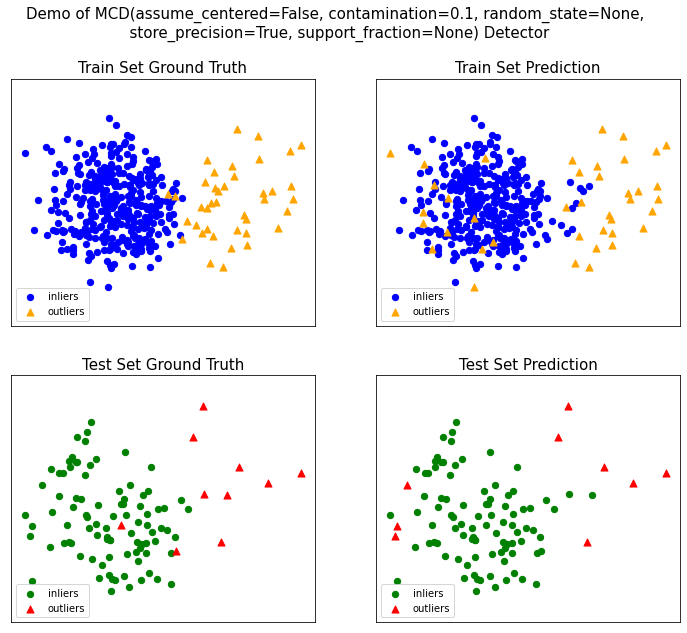

In [11]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE

visualize(clf, train_principalComponents, y_train,
          test_principalComponents, y_test,
          y_train_pred, y_test_pred)

In [12]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

clf_CBLOF = CBLOF() # initialize CBLOF class using the default parameters

clf_CBLOF.fit(X_train)
#y_train_pred = clf.predict(X_train)
y_train_pred_CBLOF = clf_CBLOF.labels_
y_test_pred_CBLOF = clf_CBLOF.predict(X_test)
out_score_CBLOF = clf_CBLOF.decision_function(X_test)

evaluate_print(clf_CBLOF, y_test, out_score_CBLOF)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.8733, precision @ rank n:0.6


/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


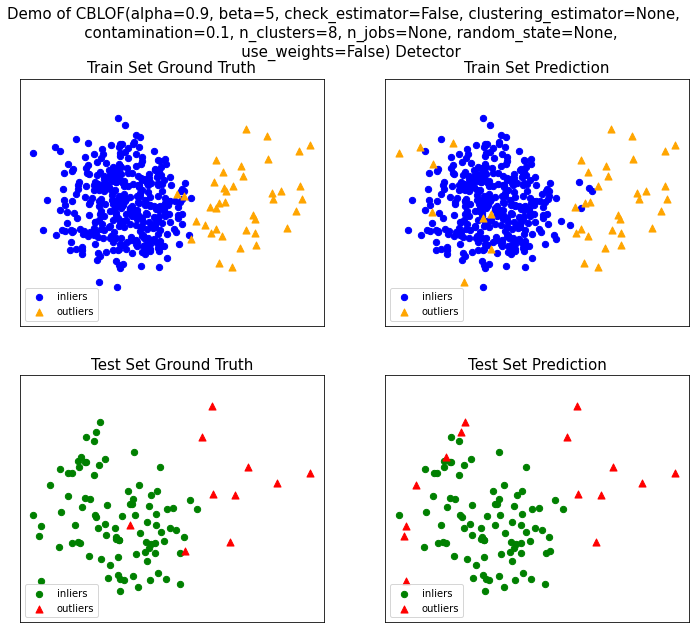

In [13]:
pca_CBLOF = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents_CBLOF = pca_CBLOF.fit_transform(X_train)
test_principalComponents_CBLOF = pca_CBLOF.fit_transform(X_test)

visualize(clf_CBLOF, train_principalComponents_CBLOF, 
          y_train,test_principalComponents_CBLOF, y_test, 
          y_train_pred_CBLOF, y_test_pred_CBLOF)

In [14]:
# YOUR CODE SHOULD COME HERE

clf_COPOD = COPOD() # initialize COPOD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE

clf_COPOD.fit(X_train)
#y_train_pred = clf.predict(X_train)
y_train_pred_COPOD = clf_COPOD.labels_
y_test_pred_COPOD = clf_COPOD.predict(X_test)
out_score_COPOD = clf_COPOD.decision_function(X_test)

evaluate_print(clf_COPOD, y_test, out_score_COPOD)

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


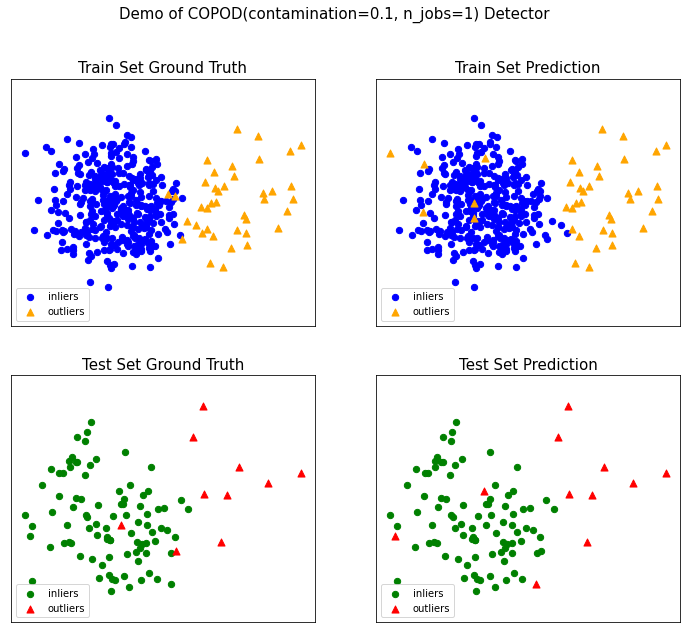

In [15]:
pca_COPOD = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents_COPOD = pca_COPOD.fit_transform(X_train)
test_principalComponents_COPOD = pca_COPOD.fit_transform(X_test)

# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE

visualize(clf_COPOD, train_principalComponents_COPOD, y_train,
          test_principalComponents_COPOD, y_test,
          y_train_pred_COPOD, y_test_pred_COPOD)

 In its orginal design, CBLOF takes data set and a model which was directed by the clustering algorithm as an input so as to classify the data into the divided clusters. By doing so, it generates different size of clusters, which will be the basis for the anormaly score along with the distance measurement. So with this method, we've got a ROC value of 0.9089, which is greater than that from MCD and less than that from COPOD. 
 
 COPOD, which calculates the anormaly score based on the tail probilities built upon empirical copula, gives us the extremness of each data point. This property of COPOD might provide one with computational efficiency, free of selecting parameters, and high interpretability. The result from COPOD shows highest ROC score of 0.9556. 

 MCDuses minum covariance determinant as its outlier detection approach and here has the ROC value of 0.8689, which is the lowest value among the method we've adopted. 
 
 In terms of ROC, the area of which gives information on how strong the model's discriminant ability is and which is the function of specificity and sensitivity, COPOD seems to have powerful performance on the data in question 'here', which is followed by CBLOF and MCD. However, this order can be differed when the data set is altered, although the probility of COPOD showing higher ROC is quite high as it is kind of most lastest and complex version of outlier detection. This trens also can be seen well in the visualization

# Question 4

PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

In terms of optimization, one might want to minimize the number of extracted feature which is the result of our feature engineering such as PCA. How we can convey as much information the original data has as possible with the limited number of newly generated linear combination of features? One of the approaches is using covariacne information (matrix). By referring to the covariance matrix, we can identify which pairs have lowest correlations, allowing us to express as much as variability of the existing features with a handful number of engineered features.  



# Question 5: Pre-processing and sampling

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [16]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [17]:
col_array = data.columns.values
for column in col_array:
    NaN_i = data[column].isna().sum()
    print("The number of NaN in the column {} is {}.".format(column, NaN_i))

The number of NaN in the column MSSubClass is 0.
The number of NaN in the column MSZoning is 0.
The number of NaN in the column LotFrontage is 259.
The number of NaN in the column LotArea is 0.
The number of NaN in the column Alley is 1369.
The number of NaN in the column OverallQual is 0.
The number of NaN in the column OverallCond is 0.
The number of NaN in the column YearBuilt is 0.
The number of NaN in the column YearRemodAdd is 0.
The number of NaN in the column MasVnrArea is 8.
The number of NaN in the column ExterQual is 0.
The number of NaN in the column BsmtFinSF1 is 0.
The number of NaN in the column BsmtFinSF2 is 0.
The number of NaN in the column BsmtUnfSF is 0.
The number of NaN in the column TotalBsmtSF is 0.
The number of NaN in the column HeatingQC is 0.
The number of NaN in the column CentralAir is 0.
The number of NaN in the column Electrical is 1.
The number of NaN in the column 1stFlrSF is 0.
The number of NaN in the column 2ndFlrSF is 0.
The number of NaN in the co

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [18]:
# import copy in order to conduct deep copy 
# which is being used to avoid the possibility 
# of shallow copy. 

import copy

data_dm = copy.deepcopy(data)

bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']


data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'],bins = bins, 
                                    labels = labels, include_lowest = True)

data_dm['binned_yr_built'].value_counts()

2000-2020    364
1960-1980    356
1940-1960    245
1980-2000    238
1920-1940    139
1900-1920    103
Name: binned_yr_built, dtype: int64

In [19]:
yrbuilt_onehot = pd.get_dummies(data_dm['binned_yr_built'], prefix='Year')
yrbuilt_onehot

,Year_1900-1920,Year_1920-1940,Year_1940-1960,Year_1960-1980,Year_1980-2000,Year_2000-2020
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,1,0,0
1457,0,0,1,0,0,0
1458,0,0,1,0,0,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [20]:
# Create a new data frame which will be utilized for drop
data_dropped = pd.read_csv("sales_data.csv")
col_array = data_dropped.columns.values

# Create a list indicating the name of dropped columns
col_dropped = []

for column in col_array:
    
    # Calculate the number of missing value in a row
    num_missing = data[column].isna().sum()
    length_col = len(data[column])
    
    if num_missing / length_col > 0.65:
        
        data_dropped.drop(columns = column, inplace = True)
        col_dropped.append(column)

print("The columns dropped are {}".format(col_dropped))
data_dropped

The columns dropped are ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,6,5,1999,2000,0.0,TA,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,RL,85.0,13175,6,6,1978,1988,119.0,TA,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,RL,66.0,9042,7,9,1941,2006,0.0,Ex,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,RL,68.0,9717,5,6,1950,1996,0.0,TA,...,366,0,112,0,0,0,0,4,2010,142125



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [21]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
sample_mean = sample_ages.mean()
#Population mean
population_mean = data['SalePrice'].mean()
print("sample mean of", sample_mean, "is less than", "population mean of", population_mean)

sample mean of 178292.63125 is less than population mean of 180921.19589041095


In [22]:
import scipy.stats
from statistics import pstdev

e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [23]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value

# right tail signifance level with a = 0.05
z_critical = scipy.stats.norm.ppf(1-.025)

#Get population standard deviation
pop_stdev = pstdev(data_dm['SalePrice'])

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value

print(confidence_interval)

(166527.41880815718, 197657.64119184282)


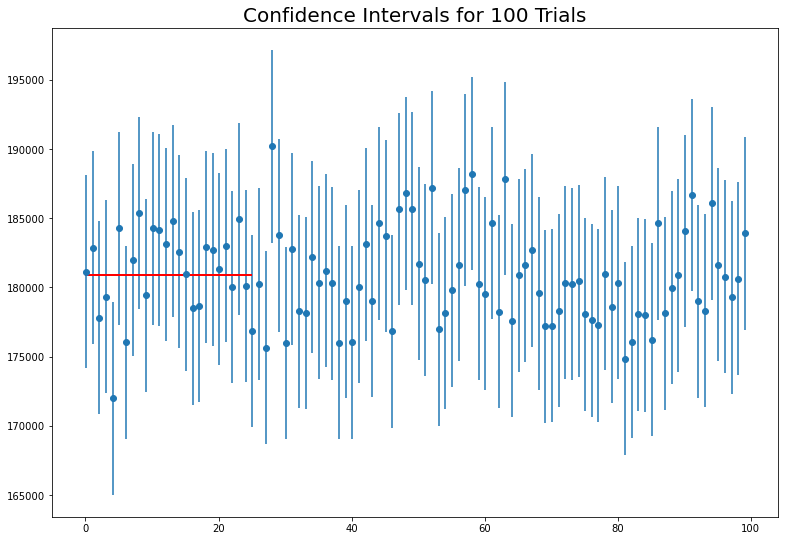

In [24]:
import numpy as np

np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value

    # compute population standard deviation     
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()